## This notebook contains analysis part of the dataset and trained models

### Dataset Analaysis (focusing on EF)

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/home/miglab/Echonet-Dynamic/EchoNet-Dynamic-Data/FileList.csv')

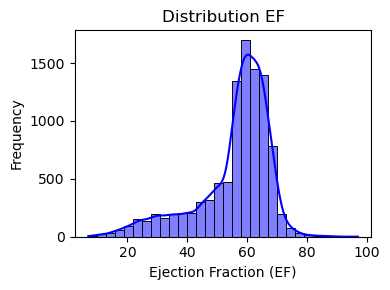

In [59]:
plt.figure(figsize=(4, 3))
sns.histplot(data['EF'], bins=30, kde=True, color='blue')
plt.title('Distribution EF')
plt.xlabel('Ejection Fraction (EF)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("EchoNet-Dynamic-Data/analysis_images/EJ_dist.png")
plt.show()


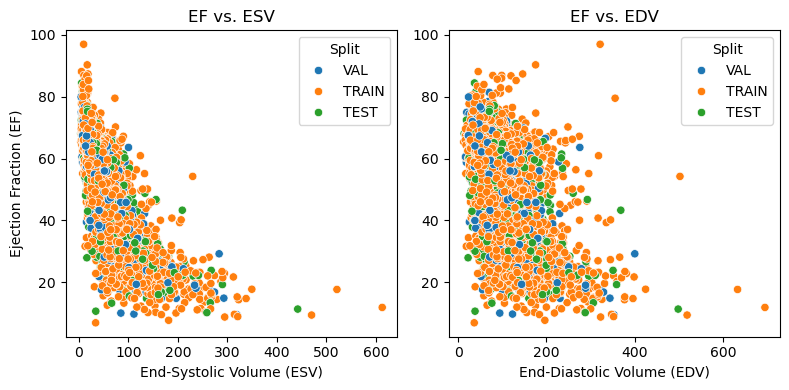

In [60]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['ESV'], y=data['EF'], hue=data['Split'])
plt.title('EF vs. ESV')
plt.xlabel('End-Systolic Volume (ESV)')
plt.ylabel('Ejection Fraction (EF)')


plt.subplot(1, 2, 2)
sns.scatterplot(x=data['EDV'], y=data['EF'], hue=data['Split'])
plt.title('EF vs. EDV')
plt.xlabel('End-Diastolic Volume (EDV)')
plt.ylabel('')
plt.tight_layout()
plt.savefig("EchoNet-Dynamic-Data/analysis_images/EFvsEDVvsESV.png")
plt.show()

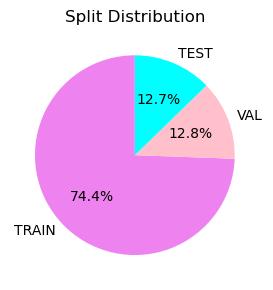

In [61]:
plt.figure(figsize=(3, 3))
data['Split'].value_counts().plot.pie(autopct='%1.1f%%', colors=['violet', 'pink', 'cyan'], startangle=90)
plt.title('Split Distribution')
plt.ylabel('')
plt.tight_layout()
plt.savefig('EchoNet-Dynamic-Data/analysis_images/split.png')
plt.show()

## Trained Models Analysis

In [62]:
resnet101 = pd.read_csv("/home/miglab/Echonet-Dynamic/Training_results/deeplabv3_resnet101_training.csv")
mobilenetv3 = pd.read_csv("/home/miglab/Echonet-Dynamic/Training_results/deeplabv3_mobilenetv3_training.csv")
dpt_large = pd.read_csv("/home/miglab/Echonet-Dynamic/Training_results/intel_dpt_large_training.csv")

In [63]:
resnet101['model'] = 'ResNet101'
mobilenetv3['model'] = 'MobileNetV3'
dpt_large['model'] = 'DPT-Large'

In [64]:
data = pd.concat([resnet101, mobilenetv3, dpt_large])

In [65]:
data

,Unnamed: 0,epoch,phase,loss,overall_dice,diastolic_dice,systolic_dice,time_taken,intersection_size,gpu_memory_allocated,gpu_memory_reserved,batch_size,model
0,0,0,train,0.106762,0.765444,0.740109,0.783344,66.249633,7456,7233432576,7910457344,32,ResNet101
1,1,0,val,0.048443,0.894879,0.876238,0.906808,6.986914,1288,1439695360,7910457344,32,ResNet101
2,2,1,train,0.047904,0.895239,0.875500,0.907777,66.708720,7456,7233432576,7910457344,32,ResNet101
3,3,1,val,0.045802,0.898413,0.884425,0.907521,6.722609,1288,1439695360,7910457344,32,ResNet101
4,4,2,train,0.042328,0.906675,0.888373,0.918094,66.655976,7456,7233432576,7910457344,32,ResNet101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,35,17,val,0.108179,0.797758,0.749313,0.832282,236.829625,1288,5332796416,18815647744,2,DPT-Large
36,36,18,train,0.090955,0.798561,0.786150,0.807081,3708.769220,7460,18289837568,18815647744,2,DPT-Large
37,37,18,val,0.207001,0.200171,0.171624,0.217363,223.956185,1288,5327856640,18815647744,2,DPT-Large
38,38,19,train,0.090485,0.799767,0.787829,0.807960,3521.032805,7460,18287613440,18815647744,2,DPT-Large


In [66]:
palette = sns.color_palette("Set2", 3)

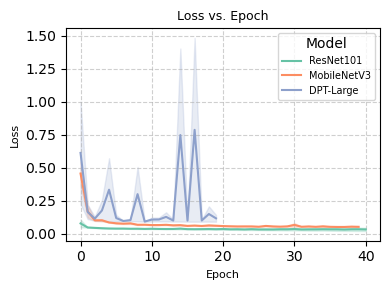

In [67]:
plt.figure(figsize=(4, 3))
sns.lineplot(data=data, x='epoch', y='loss', hue='model', palette=palette)
plt.title('Loss vs. Epoch', fontsize=9)
plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Loss', fontsize=8)
plt.legend(title='Model', fontsize=7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("EchoNet-Dynamic-Data/analysis_images/loss_epoch.png")

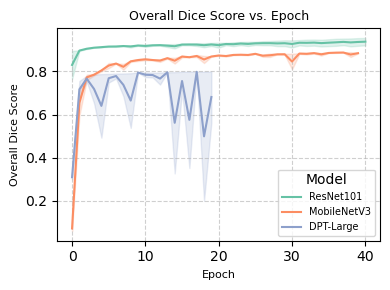

In [68]:
plt.figure(figsize=(4, 3))
sns.lineplot(data=data, x='epoch', y='overall_dice', hue='model', palette=palette)
plt.title('Overall Dice Score vs. Epoch', fontsize=9)
plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Overall Dice Score', fontsize=8)
plt.legend(title='Model', fontsize=7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("EchoNet-Dynamic-Data/analysis_images/loss_overall_dice.png")

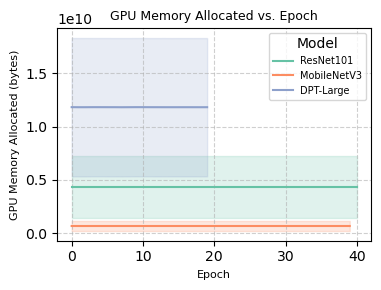

In [69]:
plt.figure(figsize=(4, 3))
sns.lineplot(data=data, x='epoch', y='gpu_memory_allocated', hue='model', palette=palette)
plt.title('GPU Memory Allocated vs. Epoch', fontsize=9)
plt.xlabel('Epoch', fontsize=8)
plt.ylabel('GPU Memory Allocated (bytes)', fontsize=8)
plt.legend(title='Model', fontsize=7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("EchoNet-Dynamic-Data/analysis_images/models_vs_gpu_memory.png")

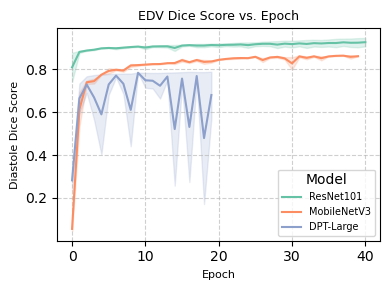

In [72]:
plt.figure(figsize=(4, 3))
sns.lineplot(data=data, x='epoch', y='diastolic_dice', hue='model', palette=palette)
plt.title('EDV Dice Score vs. Epoch', fontsize=9)
plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Diastole Dice Score', fontsize=8)
plt.legend(title='Model', fontsize=7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("EchoNet-Dynamic-Data/analysis_images/loss_edv_dice.png")

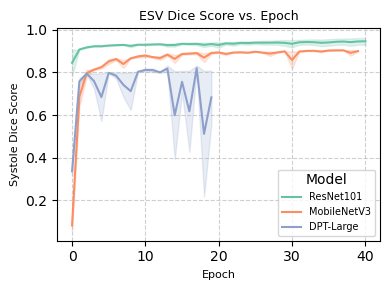

In [73]:
plt.figure(figsize=(4, 3))
sns.lineplot(data=data, x='epoch', y='systolic_dice', hue='model', palette=palette)
plt.title('ESV Dice Score vs. Epoch', fontsize=9)
plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Systole Dice Score', fontsize=8)
plt.legend(title='Model', fontsize=7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("EchoNet-Dynamic-Data/analysis_images/loss_esv_dice.png")